预准备工作

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #用来自定义图表风格的模块

#magic command
%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from matplotlib.font_manager import FontProperties #画图自定义字体
from pylab import mpl #画图自定义字体
mpl.rcParams['font.sans-serif']=['SimHei'] #指定默认字体

# 导入数据

In [33]:
#导入处理
data=pd.read_csv('E:/Python Github HW/ZhaoQy/000001.csv')
data['Day']=pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day',inplace=True)
data['Close']=pd.to_numeric(data['Close'],errors='coerce')
data['Preclose']=data['Close'].shift(1)  #实现数据平移，向下移动一行数据
data['Return']=(data['Close']-data['Preclose'])/data['Preclose']
data


,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1990-12-19,NaN,96.0500,99.9800,95.7900,99.9800,126000,4.940000e+05,NaN
1990-12-20,99.9800,104.3000,104.3900,99.9800,104.3900,19700,8.400000e+04,0.044109
1990-12-21,104.3900,109.0700,109.1300,103.7300,109.1300,2800,1.600000e+04,0.045407
1990-12-24,109.1300,113.5700,114.5500,109.1300,114.5500,3200,3.100000e+04,0.049666
1990-12-25,114.5500,120.0900,120.2500,114.5500,120.2500,1500,6.000000e+03,0.049760
...,...,...,...,...,...,...,...,...
2024-07-25,2901.9518,2891.8918,2897.7674,2872.8497,2886.7416,27463950000,2.732820e+11,-0.005241
2024-07-26,2886.7416,2885.9953,2899.1162,2875.3959,2890.8973,27838753600,2.754430e+11,0.001440
2024-07-29,2890.8973,2889.4726,2898.9512,2878.5825,2891.8453,25689972700,2.600950e+11,0.000328


# Monthly Return

In [34]:
data_new=data['1995-01-01':'2024-12-31'].copy()
Month_data=data_new.resample('ME')['Return'].apply(lambda x:(1+x).prod()-1).to_frame() #lambda：定义一个匿名函数
Month_data


,Return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-03-31,0.008622
2024-04-30,0.020932
2024-05-31,-0.005801


# 画图Plot

C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_5540\12662127.py:23: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.savefig('China_Stock_Market_Monthly_Return.pdf')
e:\Python class\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


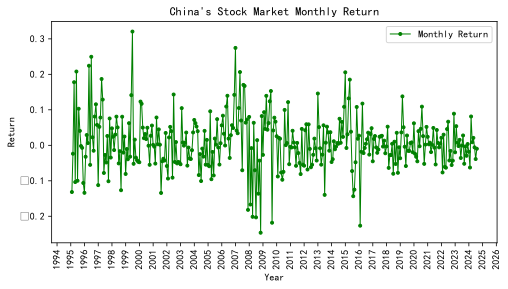

In [35]:
fig,ax=plt.subplots(figsize=(8,4))#选择图形大小

ax.plot('Return', #图片数据
'.-',#图片类型，
color='g',#图片颜色
label='Monthly Return',#图片标签
linewidth=1,#图片线宽
data=Month_data)#图片数据来源
ax.set_title("China's Stock Market Monthly Return")
ax.set_xlabel('Year')
ax.set_ylabel('Return')

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

#转制x轴的日期显示格式
plt.xticks(rotation=90)

#添加图例
plt.legend(loc='upper right',fontsize=10)
fig.savefig('China_Stock_Market_Monthly_Return.pdf')

plt.show();

DIY

C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_5540\2881053005.py:23: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.savefig('China_Stock_Market_Monthly_Return2.pdf')
e:\Python class\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


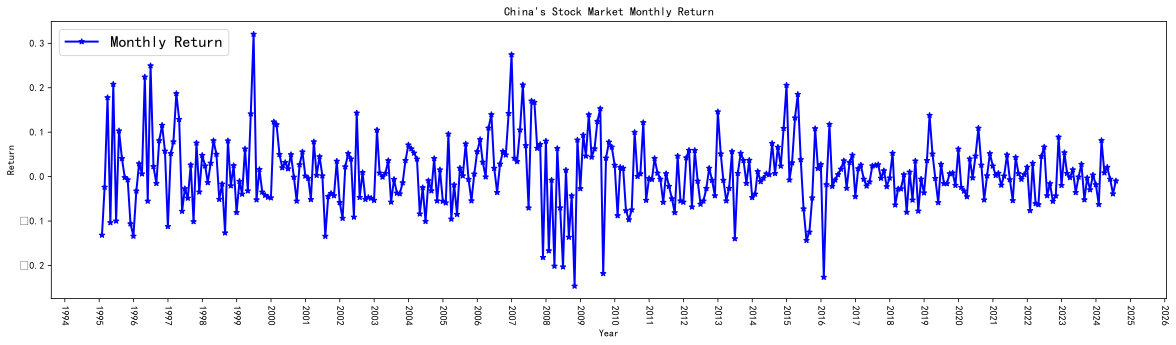

In [36]:
fig,ax=plt.subplots(figsize=(20,5))#选择图形大小（宽，高）

ax.plot('Return', #图片数据
'*-',#图片类型，（节点图案、线段）
color='b',#图片颜色（blue）
label='Monthly Return',#图片标签
linewidth=2,#图片线宽
data=Month_data)#图片数据来源
ax.set_title("China's Stock Market Monthly Return")
ax.set_xlabel('Year')
ax.set_ylabel('Return')

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y') #年
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

#转制x轴的日期显示格式
plt.xticks(rotation=270) #横轴数据转置270°

#添加图例
plt.legend(loc='upper left',fontsize=16) #图例位置：left
fig.savefig('China_Stock_Market_Monthly_Return2.pdf')

plt.show();

In [37]:
Month_data['2009':'2009']

,Return
Day,
2009-01-31,0.093283
2009-02-28,0.046311
2009-03-31,0.139405
2009-04-30,0.043974
2009-05-31,0.062707
2009-06-30,0.123980
2009-07-31,0.152972
2009-08-31,-0.218144
2009-09-30,0.041867


In [39]:
Month_data['2000':'2010']['Return'].mean()

0.009097037214487238

一些说明

In [27]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line pro